In [6]:
import pod5
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
import importlib
from qc import *

In [88]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

In [15]:
neg_nuclei = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_0.sorted.bam'
pos_nuclei_20 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_20.sorted.bam'
pos_nuclei_100 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_100.sorted.bam'
pos_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_500.sorted.bam'
pos_sphe_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220517_ang_500.sorted.bam'
chrom_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/220331_Nuclei_Ang500_doradoBasecalled_movesOut.sorted.bam'
chrom_sphe_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/sphe/220524_500Ang_Spheroblast_dorado_movesOut_sorted.bam'
nuclei_chrom_210615 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20210615_0802_shelansky_chrom.sorted.bam'
nuclei_neg_210615 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/20210615_neg.sorted.bam'
nuclei_chrom_190819 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20190819_chrom.sorted.bam'
nuclei_neg_190819 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/20190819_neg.sorted.bam'
nuclei_neg_190429 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/20190429_neg.sorted.bam'
nuclei_chrom_190429 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20190429_chrom.sorted.bam'

In [97]:
def aggreadqc(bam, max_reads=''):
    aveReadLen, aveReadqual = [], []
    readCount = 0
    samfile = pysam.AlignmentFile(bam, "rb")
    for s in samfile:
        if s.is_mapped and not s.is_supplementary and not s.is_secondary:
            aveReadLen.append(np.log10(s.reference_length+1))
            aveReadqual.append(np.mean(s.query_qualities))
            readCount+=1
        
        if max_reads:
            if readCount > max_reads:
                break
    samfile.close()
    return aveReadLen, aveReadqual

In [104]:
bams = [ chrom_sphe_500, pos_sphe_500, chrom_nuclei_500,  neg_nuclei, pos_nuclei_20, pos_nuclei_100, pos_nuclei_500, 
         nuclei_chrom_210615, nuclei_neg_210615, nuclei_neg_190819, nuclei_chrom_190819, nuclei_neg_190429, nuclei_chrom_190429]
labels = ['500uM_chrom_sphe_220524', '500uM_pos_sphe_220517', '500uM_chrom_nuclei_220331', '0uM_neg_nuclei_220308', '20uM_pos_nuclei_220308', '100uM_pos_nuclei_220308', '500uM_pos_nuclei_220308',
          '500uM_chrom_nuclei_210615', '0uM_neg_nuclei_210615', '0uM_neg_nuclei_190819', '500uM_chrom_nuclei_190819', '0uM_neg_nuclei_190429', '500uM_chrom_nuclei_190429']
outf = open(dt_outpath + '1_read_qc.tsv', 'w')
outf.write('sample\treadlength_mean\treadlength_median\treadlength_std\treadquality_mean\teadquality_median\treadquality_std\tnreads\n')
cmap = plt.get_cmap('tab20')
plt.figure(figsize=(6, 12 ))
fig, [ax1, ax2] = plt.subplots(1,2)
allreadLen, allReadqual = [], []
for i in range(len(bams)):
    aveReadLen, aveReadqual = aggreadqc(bams[i])
    allreadLen.append(aveReadLen)
    allReadqual.append(aveReadqual)
    label = labels[i]
    
    outf.write(f'{label}\t{np.mean(aveReadLen)}\t{np.median(aveReadLen)}\t{np.std(aveReadLen)}\t{np.mean(aveReadqual)}\t{np.median(aveReadqual)}\t{np.std(aveReadqual)}\n')
    
    ax1.hist(aveReadLen, np.arange(1, 5, 0.1), density = True, color = cmap(i), alpha = 1)
    ax1.set_xlabel('log10 (read length)')
    ax1.set_ylabel('density')

    ax2.hist(aveReadqual, np.arange(1, 50, 1), density = True, label = label, color = cmap(i), alpha = 1)
    ax2.set_xlabel('read quality')
    ax2.set_ylabel('density')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'1_all_readlength_readquality_distribution.pdf', bbox_inches='tight')
plt.close()
outf.close()

<Figure size 600x1200 with 0 Axes>

In [112]:
from tqdm import tqdm

In [114]:
plt.figure(figsize=(6, 18))
fig, [ax1, ax2] = plt.subplots(1,2)
for i in tqdm(range(len(allreadLen))):
    aveReadLen = allreadLen[i]
    aveReadqual = allReadqual[i]
    ax1.hist(aveReadLen, np.arange(1, 5, 0.1), density = True, color = cmap(i), alpha = 0.6)
    ax1.set_xlabel('log10 (read length)')
    ax1.set_ylabel('density')
    ax2.hist(aveReadqual, np.arange(1, 50, 1), density = True, label = labels[i], color = cmap(i), alpha = 0.6)
    ax2.set_xlabel('read quality')
    ax2.set_ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'1_all_readlength_readquality_distribution.pdf', bbox_inches='tight')
plt.close()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:09<00:00,  5.33s/it]


<Figure size 600x1800 with 0 Axes>

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 17.66it/s]


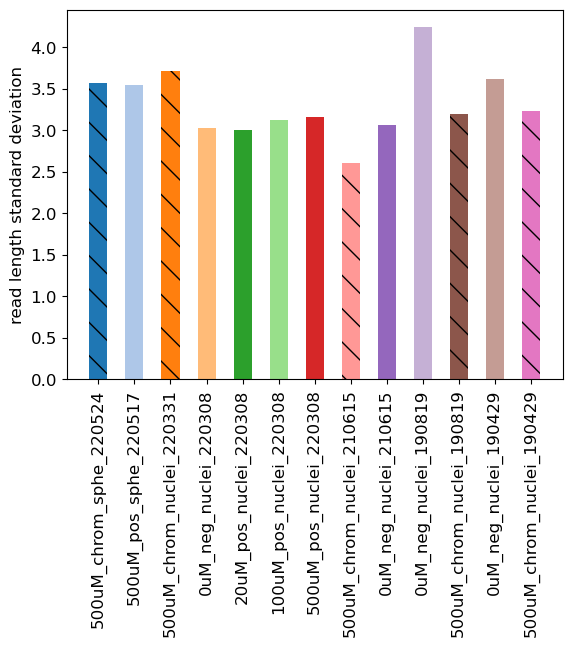

In [122]:
for i in tqdm(range(len(allreadLen))):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.mean(allreadLen[i]), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allreadLen)), labels, rotation = 90)
plt.ylabel('read length mean')
plt.savefig(fig_outpath+ '1_all_readlen_mean.pdf', bbox_inches='tight')
plt.close()

for i in tqdm(range(len(allreadLen))):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.median(allreadLen[i]), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allreadLen)), labels, rotation = 90)
plt.ylabel('read length median')
plt.savefig(fig_outpath+ '1_all_readlen_median.pdf', bbox_inches='tight')
plt.close()


for i in tqdm(range(len(allreadLen))):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.median(allreadLen[i]), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allreadLen)), labels, rotation = 90)
plt.ylabel('read length standard deviation')
plt.savefig(fig_outpath+ '1_all_readlen_std.pdf', bbox_inches='tight')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.62it/s]


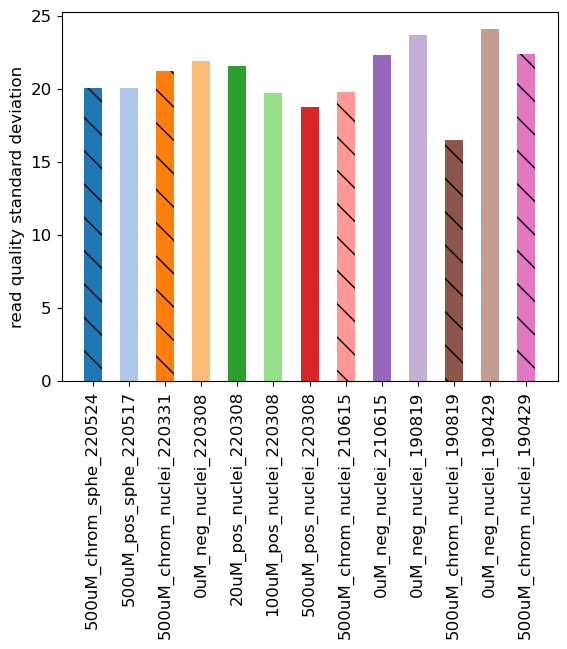

In [124]:
for i in tqdm(range(len(allReadqual))):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.mean(allReadqual[i]), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allReadqual)), labels, rotation = 90)
plt.ylabel('read quality mean')
plt.savefig(fig_outpath+ '1_all_readqual_mean.pdf', bbox_inches='tight')
plt.close()

for i in tqdm(range(len(allReadqual))):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.median(allReadqual[i]), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allReadqual)), labels, rotation = 90)
plt.ylabel('read quality median')
plt.savefig(fig_outpath+ '1_all_readqual_median.pdf', bbox_inches='tight')
plt.close()


for i in tqdm(range(len(allReadqual))):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.median(allReadqual[i]), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allReadqual)), labels, rotation = 90)
plt.ylabel('read quality standard deviation')
plt.savefig(fig_outpath+ '1_all_readqual_std.pdf', bbox_inches='tight')

In [ ]:
for i in tqdm(range(len(allReadqual))):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.log10(len(allReadqual[i])), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allReadqual)), labels, rotation = 90)
plt.ylabel('log10(total number of aligned reads)')
plt.savefig(fig_outpath+ '1_all_n_aligned_reads.pdf', bbox_inches='tight')
plt.close()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 206.21it/s]
